In [2]:
using HDF5
using PGFPlots

In [3]:
filepath = "../../data/results/data/da_sim_pos_ce.h5"
f_pos = h5open(filepath, "r")
filepath = "../../data/results/data/da_sim_tgt_loss.h5"
f_all = h5open(filepath, "r")

HDF5 data file: ../../data/results/data/da_sim_tgt_loss.h5

In [4]:
modes = ["with_adapt", "without_adapt", "target_only"]
mode_labels = Dict(
"with_adapt"=>"with adapt",
"without_adapt"=>"no adapt",
"target_only"=>"target only"
)

mode_styles = Dict(
"with_adapt"=>"blue, thick",
"without_adapt"=>"cyan, thick",
"target_only"=>"red, thick"
);

In [5]:
function extract_means_std_errs(f)
    means = Dict()
    std_errs = Dict()
    for mode in modes
        read(f[mode])
        means[mode] = read(f["$(mode)/means"])
        std_errs[mode] = read(f["$(mode)/std_errs"])
    end
    sample_sizes = read(f["sample_sizes"]);
    return means, std_errs, sample_sizes
end

extract_means_std_errs (generic function with 1 method)

In [6]:
pos_means, pos_std_errs, sample_sizes = extract_means_std_errs(f_pos)
all_means, all_std_errs, _ = extract_means_std_errs(f_all)

(Dict{Any,Any}(Pair{Any,Any}("with_adapt",Float32[0.0195298,0.0160226,0.0180159,0.0160164,0.0168475]),Pair{Any,Any}("target_only",Float32[0.0252767,0.0158097,0.0136012,0.0137504,0.0133166]),Pair{Any,Any}("without_adapt",Float32[0.0253277,0.0146766,0.0128576,0.0124047,0.0123263])),Dict{Any,Any}(Pair{Any,Any}("with_adapt",[0.00080429,0.000963787,0.00110011,0.000672719,0.000774706]),Pair{Any,Any}("target_only",[0.00103499,0.000137664,0.000179526,0.000145813,7.86227e-5]),Pair{Any,Any}("without_adapt",[0.000474811,0.000308605,0.000131024,9.98306e-5,4.60425e-5])),[0,10,25,50,100])

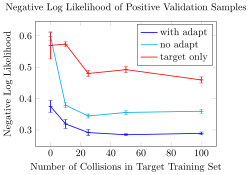

In [7]:
pos_a = Axis(
    width="8cm",
    height="6cm",
    xlabel="Number of Collisions in Target Training Set",
    ylabel="Negative Log Likelihood",
    title="Negative Log Likelihood of Positive Validation Samples",
)
for mode in modes
    p = Plots.Linear(
        sample_sizes, 
        pos_means[mode], 
    errorBars = ErrorBars(y=pos_std_errs[mode], style="thick"),
        legendentry="$(mode_labels[mode])",
        style=mode_styles[mode],
        mark="none"
    )
    push!(pos_a, p)
end
save("../../data/results/vis/da_sim_pos.tex", pos_a, include_preamble=false)
pos_a

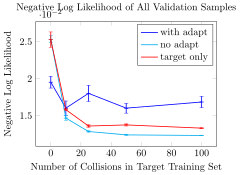

In [21]:
all_a = Axis(
    width="8cm",
    height="6cm",
    xlabel="Number of Collisions in Target Training Set",
    ylabel="Negative Log Likelihood",
    title="Negative Log Likelihood of All Validation Samples"
)
for mode in modes
    p = Plots.Linear(
        sample_sizes, 
        all_means[mode], 
        errorBars = ErrorBars(y=all_std_errs[mode], style="thick"),
        legendentry="$(mode_labels[mode])",
        style=mode_styles[mode],
        mark="none"
    )
    push!(all_a, p)
end
save("../../data/results/vis/da_sim_all.tex", all_a, include_preamble=false)
all_a

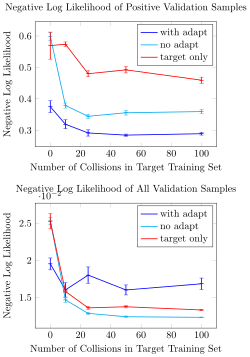

In [23]:
g = GroupPlot(1, 2, groupStyle = "horizontal sep = 1cm, vertical sep = 2cm");
push!(g, pos_a)
push!(g, all_a)
save("../../data/results/vis/da_sim.tex", g)
g